In [1]:
from retrieve_features import get_features
import six.moves.cPickle as pickle
import numpy as np
import copy
from joblib import Parallel, delayed

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib import cm

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
large_features = ['bars_start', 'beats_start', 'sections_start', 'segments_timbre', 'segments_loudness_max']

In [5]:
features = {}
with open('features_inc.pkl', 'rb') as pickle_file:
    try:
       for _ in range(500000):
            entry = pickle.load(pickle_file, encoding='bytes', fix_imports=True)
            features[entry[0]] = entry[1]
    except EOFError:
        pass

In [6]:
for feat_name in large_features:
    more_features = get_features(feat_name)
    print(feat_name, len(more_features))
    for path in more_features:
        features[path].update(more_features[path])

bars_start 256755
beats_start 236964
sections_start 250080
segments_timbre 252397
segments_loudness_max 257534


In [14]:
#to_del = []
#for path in features.keys():
#    if len(features.get(path, [])) < 45:
#        to_del.append(path)
#for path in to_del:
#    del features[path]

236306

In [30]:
path = list(features.keys())[0]
full_feature_list = list(features[path].keys())
full_feature_list.remove('song_id')

In [31]:
granularity = 5
class_labels = {path: (features[path]['year']-1965)//5 for path in features}
feature_index_mapping = {f:i for i,f in enumerate(full_feature_list)}

In [32]:
feature_map = [[[] for _ in range(10)] for _ in range(len(full_feature_list))]
for path in features:
    j = class_labels[path]
    for i,f in enumerate(full_feature_list):
        feature_map[i][j].append(features[path][f])

In [35]:
heatmap_mean = [[0 for _ in range(10)] for _ in range(len(full_feature_list))]
for i in range(len(full_feature_list)):
    for j in range(10):
        try:
            heatmap_mean[i][j] = np.mean(feature_map[i][j])
        except:
            print(feature_map[i][j])

In [38]:
heatmap_mean

[[315.95413843628012,
  318.64980853130248,
  317.11000203898692,
  304.82273655151107,
  291.68450321494169,
  298.75863605419727,
  315.53562968415861,
  333.92042149156197,
  335.76164114891247,
  331.54500983829325],
 [0.00092564360567218458,
  0.00080738544284694356,
  0.00064618324853952993,
  0.00054496763055861697,
  0.00069246287387702827,
  0.00080696469616749796,
  0.00079312939177064246,
  0.00078391284701274998,
  0.00076494803215882844,
  0.00084980584628281458],
 [0.75051599587203299,
  0.72891454105380749,
  0.70503246753246751,
  0.67200312377977356,
  0.68367171369580182,
  0.69582631650812432,
  0.67847109900400104,
  0.64897988351734737,
  0.63957404535762741,
  0.65677243261685436],
 [-10.381592234262124,
  -11.521327220256936,
  0.23775373376623382,
  13.081308993882596,
  12.752009420165175,
  4.6895358199444717,
  3.577357225958401,
  0.18109362382534752,
  0.040724668055824698,
  -6.4040065677243261],
 [0.78975877192982447,
  0.93779352075963496,
  0.8996443181

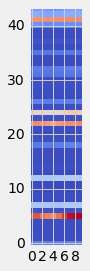

In [41]:
fig, ax = plt.subplots()

cax = ax.imshow(heatmap_mean, origin='lower', interpolation='nearest', cmap=cm.coolwarm)